In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.cbook import get_sample_data

In [2]:
def convertdate(x):
    return np.datetime64(x, "D")

In [3]:
fname = get_sample_data("Stocks.csv", asfileobj=False)
stock_data = np.genfromtxt(
    fname, encoding="utf-8", delimiter=",", skip_header=1,
    names=True, dtype=None, converters={0: convertdate},
)

In [4]:
stocks_name = [
    "IBM", "Apple", "Microsoft", "Xerox", "Amazon", "Dell",
    "Alphabet", "Adobe", "S&P 500", "NASDAQ",
]
stocks_ticker = [
    "IBM", "AAPL", "MSFT", "XRX", "AMZN", "DELL", "GOOGL", "ADBE", "GSPC", "IXIC",
]

# Manually adjust the label positions vertically (units are points = 1/72 inch)
y_offsets = {k: 0 for k in stocks_ticker}
y_offsets["IBM"] = 5
y_offsets["AAPL"] = -5
y_offsets["AMZN"] = -6

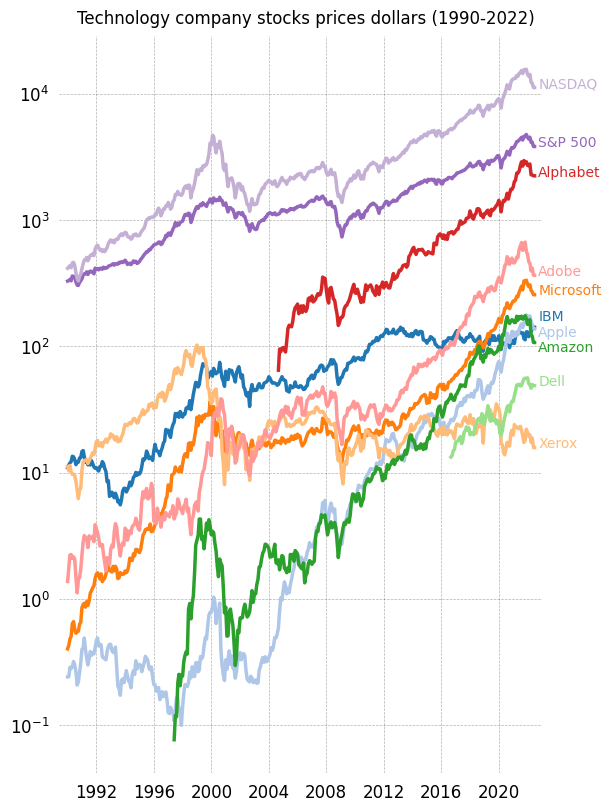

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8), layout="constrained")

# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a", "#d62728",
    "#ff9896", "#9467bd", "#c5b0d5", "#8c564b", "#c49c94", "#e377c2", "#f7b6d2",
    "#7f7f7f", "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5",
])

for nn, column in enumerate(stocks_ticker):
    # Plot each line separately with its own color.
    # don't include any data with NaN.
    good = np.nonzero(np.isfinite(stock_data[column]))
    line, = ax.plot(stock_data["Date"][good], stock_data[column][good], lw=2.5)

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = stock_data[column][-1]

    # Use an offset transform, in points, for any text that needs to be nudged
    # up or down.
    offset = y_offsets[column] / 72
    trans = mtransforms.ScaledTranslation(0, offset, fig.dpi_scale_trans)
    trans = ax.transData + trans

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    ax.text(
        np.datetime64("2022-10-01"), y_pos, stocks_name[nn],
        color=line.get_color(), transform=trans,
    )

ax.set_xlim(np.datetime64("1989-06-01"), np.datetime64("2023-01-01"))

fig.suptitle("Technology company stocks prices dollars (1990-2022)", ha="center")

# Remove the plot frame lines. They are unnecessary here.
ax.spines[:].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_yscale("log")

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don"t obscure the primary data lines.
ax.grid(True, "major", "both", ls="--", lw=.5, c="k", alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don"t want your viewers squinting to read your plot.
ax.tick_params(
    axis="both", which="both", labelsize="large", bottom=False, top=False,
    labelbottom=True, left=False, right=False, labelleft=True,
)

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
# fig.savefig("stock-prices.png", bbox_inches="tight")
plt.show()